In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
data1=pd.read_csv(r"C:\Users\kisha\Desktop\stockpriceprediction\notebooks\data\stock prices data.csv")

In [4]:
data1.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1970-01-02,11.099500,11.204875,10.994125,11.169750,0.101497,24400
1,1970-01-05,11.169750,11.345375,11.169750,11.345375,0.103093,13700
2,1970-01-06,11.310250,11.310250,11.029250,11.134625,0.101178,15100
3,1970-01-07,11.099500,11.099500,10.713125,10.959000,0.099582,10600
4,1970-01-08,10.959000,10.959000,10.853625,10.959000,0.099582,18000
5,1970-01-09,10.959000,10.959000,10.888750,10.888750,0.098944,7100
6,1970-01-12,11.029250,11.134625,11.029250,11.134625,0.101178,13000
7,1970-01-13,11.134625,11.169750,11.064375,11.099500,0.100859,18000
8,1970-01-14,11.099500,11.099500,10.959000,10.959000,0.099582,24400
9,1970-01-15,10.959000,11.099500,10.818500,10.818500,0.098305,10900


In [5]:
data1.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
data1.duplicated().sum()

0

In [7]:
data=data1.drop("Date",axis=1)

In [8]:
X=data.drop("Close",axis=1)

In [9]:
y=data["Close"]

In [10]:
data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [11]:
import pandas as pd
import numpy as np

# Sample DataFrame

data = pd.DataFrame(data)

# Calculate IQR
Q1 = data['Volume'].quantile(0.25)
Q3 = data['Volume'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['Volume'] < lower_bound) | (data['Volume'] > upper_bound)]

# Calculate the mean of non-outliers
mean_value = data[(data['Volume'] >= lower_bound) & (data['Volume'] <= upper_bound)]['Volume'].mean()

# Replace outliers with the mean value
data['Volume'] = data['Volume'].apply(lambda x: mean_value if (x < lower_bound or x > upper_bound) else x)



In [12]:
data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [13]:
y

0        11.169750
1        11.345375
2        11.134625
3        10.959000
4        10.959000
           ...    
12671    15.890000
12672    16.299999
12673    16.230000
12674    15.450000
12675    14.120000
Name: Close, Length: 12676, dtype: float64

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))


In [15]:
df1=scaler.fit_transform(np.array(y).reshape(-1,1))

In [16]:
print(df1)

[[0.17707211]
 [0.18173469]
 [0.1761396 ]
 ...
 [0.31141433]
 [0.29070648]
 [0.25539693]]


In [17]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size,test_size

(8239, 4437)

In [19]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [20]:
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
print(X_train)

[[0.17707211 0.18173469 0.1761396  ... 0.17520706 0.17147699 0.16774692]
 [0.18173469 0.1761396  0.17147699 ... 0.17147699 0.16774692 0.17147699]
 [0.1761396  0.17147699 0.17147699 ... 0.16774692 0.17147699 0.1658819 ]
 ...
 [0.08643142 0.11642117 0.10567859 ... 0.10567859 0.11843542 0.12492573]
 [0.11642117 0.10567859 0.10523098 ... 0.11843542 0.12492573 0.13902541]
 [0.10567859 0.10523098 0.08777424 ... 0.12492573 0.13902541 0.11776399]]


In [22]:
print(X_train.shape), print(y_train.shape)

(8228, 10)
(8228,)


(None, None)

In [23]:
print(X_test.shape), print(ytest.shape)

(4426, 10)
(4426,)


(None, None)

In [24]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] )
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],)

In [25]:
X_train

array([[0.17707211, 0.18173469, 0.1761396 , ..., 0.17520706, 0.17147699,
        0.16774692],
       [0.18173469, 0.1761396 , 0.17147699, ..., 0.17147699, 0.16774692,
        0.17147699],
       [0.1761396 , 0.17147699, 0.17147699, ..., 0.16774692, 0.17147699,
        0.1658819 ],
       ...,
       [0.08643142, 0.11642117, 0.10567859, ..., 0.10567859, 0.11843542,
        0.12492573],
       [0.11642117, 0.10567859, 0.10523098, ..., 0.11843542, 0.12492573,
        0.13902541],
       [0.10567859, 0.10523098, 0.08777424, ..., 0.12492573, 0.13902541,
        0.11776399]])

In [26]:
from sklearn.svm import SVR

In [27]:
model=SVR()

In [28]:
model.fit(X_train,y_train)

SVR()

In [29]:
y_pred=model.predict(X_test)


In [30]:
y_pred

array([0.09161158, 0.08862162, 0.08362249, ..., 0.22542023, 0.23838921,
       0.25293714])

In [31]:
from sklearn.metrics import r2_score

In [32]:
r2_score(ytest,y_pred)

0.916741690133738

In [33]:
model.score(X_train,y_train)

0.9189417296703877

In [34]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [35]:
train_predict=scaler.fit_transform(np.array(train_predict).reshape(-1,1))
test_predict=scaler.fit_transform(np.array(test_predict).reshape(-1,1))

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
mean_squared_error(y_train,train_predict)

0.007408197206946924

In [38]:
mean_squared_error(ytest,test_predict)

0.014094362636434538

In [39]:
import matplotlib.pyplot as plt

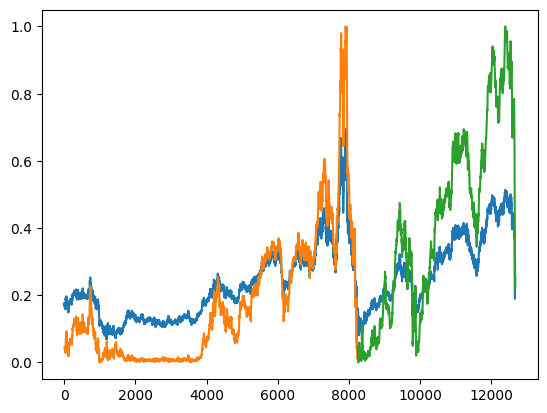

In [40]:
### Plotting 
# shift train predictions for plotting
look_back=10
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [41]:
len(test_data)

4437

In [42]:
x_input=test_data[4427:].reshape(1,-1)
x_input.shape


(1, 10)

In [43]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [44]:
temp_input

[0.20522018067191872,
 0.21185731498061455,
 0.20176889311181606,
 0.24238814799181013,
 0.28221095384398504,
 0.30238784821889825,
 0.313272719115516,
 0.31141432961105175,
 0.2907064776571451,
 0.255396925160376]

In [45]:
import numpy as np
from sklearn.svm import SVR  # Example import for SVM

# Assuming temp_input and model are already defined, e.g.
# temp_input = [initial data]
# model = trained SVM model

lst_output = []
n_steps = 10
i = 0

while i < 90:
    if len(temp_input) >10:
        x_input = np.array(temp_input[-n_steps:])
        #print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        yhat = model.predict(x_input)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input)
        x_input = x_input.reshape(1, -1)
        yhat = model.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        i += 1

print(lst_output)

0.23933940669461357
1 day output [0.22766538]
2 day output [0.21568577]
3 day output [0.20331187]
4 day output [0.19370708]
5 day output [0.18400563]
6 day output [0.17157224]
7 day output [0.1542798]
8 day output [0.13300181]
9 day output [0.11213559]
10 day output [0.09785249]
11 day output [0.08824395]
12 day output [0.08168037]
13 day output [0.07715735]
14 day output [0.07406843]
15 day output [0.07158334]
16 day output [0.06948167]
17 day output [0.06811018]
18 day output [0.0680743]
19 day output [0.06938832]
20 day output [0.07134156]
21 day output [0.07319095]
22 day output [0.07467324]
23 day output [0.07574473]
24 day output [0.07643161]
25 day output [0.07677458]
26 day output [0.07677589]
27 day output [0.07642843]
28 day output [0.07578545]
29 day output [0.0750074]
30 day output [0.07429251]
31 day output [0.07376385]
32 day output [0.07344769]
33 day output [0.07332416]
34 day output [0.07335792]
35 day output [0.07351028]
36 day output [0.07374278]
37 day output [0.074

In [46]:
np.array(lst_output).reshape(-1,1)

array([[0.23933941],
       [0.22766538],
       [0.21568577],
       [0.20331187],
       [0.19370708],
       [0.18400563],
       [0.17157224],
       [0.1542798 ],
       [0.13300181],
       [0.11213559],
       [0.09785249],
       [0.08824395],
       [0.08168037],
       [0.07715735],
       [0.07406843],
       [0.07158334],
       [0.06948167],
       [0.06811018],
       [0.0680743 ],
       [0.06938832],
       [0.07134156],
       [0.07319095],
       [0.07467324],
       [0.07574473],
       [0.07643161],
       [0.07677458],
       [0.07677589],
       [0.07642843],
       [0.07578545],
       [0.0750074 ],
       [0.07429251],
       [0.07376385],
       [0.07344769],
       [0.07332416],
       [0.07335792],
       [0.07351028],
       [0.07374278],
       [0.07401467],
       [0.07428169],
       [0.074502  ],
       [0.07464775],
       [0.07471195],
       [0.07470431],
       [0.07464266],
       [0.07454732],
       [0.07443801],
       [0.07433219],
       [0.074

In [47]:
output_scaled_data=scaler.inverse_transform(np.array(lst_output).reshape(-1,1))

In [48]:
output_scaled_data

array([[0.21335574],
       [0.20597059],
       [0.19839214],
       [0.19056424],
       [0.18448813],
       [0.17835086],
       [0.17048533],
       [0.15954591],
       [0.14608517],
       [0.13288493],
       [0.12384925],
       [0.11777076],
       [0.11361856],
       [0.11075723],
       [0.10880314],
       [0.10723104],
       [0.1059015 ],
       [0.10503388],
       [0.10501118],
       [0.10584244],
       [0.10707809],
       [0.10824804],
       [0.10918575],
       [0.10986359],
       [0.11029812],
       [0.11051509],
       [0.11051592],
       [0.11029611],
       [0.10988935],
       [0.10939715],
       [0.1089449 ],
       [0.10861046],
       [0.10841046],
       [0.10833231],
       [0.10835367],
       [0.10845005],
       [0.10859714],
       [0.10876913],
       [0.10893805],
       [0.10907743],
       [0.10916963],
       [0.10921024],
       [0.10920541],
       [0.10916641],
       [0.1091061 ],
       [0.10903694],
       [0.10897   ],
       [0.108

In [49]:
day_new=np.arange(1,101)
day_pred=np.arange(101,191)
#(101,191) Because we are predicting for 90 days

In [50]:
len(df1)

12676

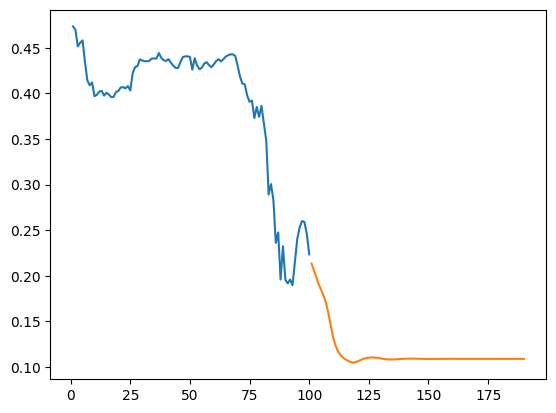

In [51]:
plt.plot(day_new,scaler.inverse_transform(np.array(df1[12576:]).reshape(-1,1)))
plt.plot(day_pred,scaler.inverse_transform(np.array(lst_output).reshape(-1,1)))


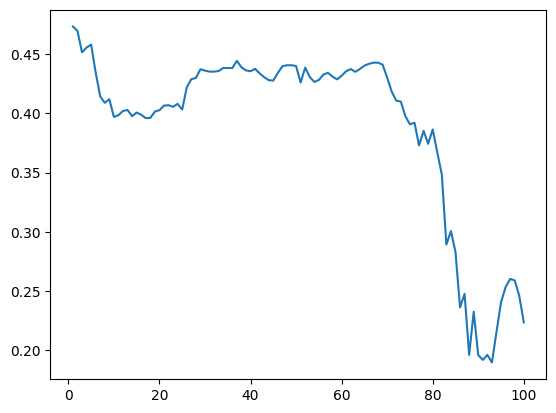

In [52]:
plt.plot(day_new,scaler.inverse_transform(np.array(df1[12576:]).reshape(-1,1)))

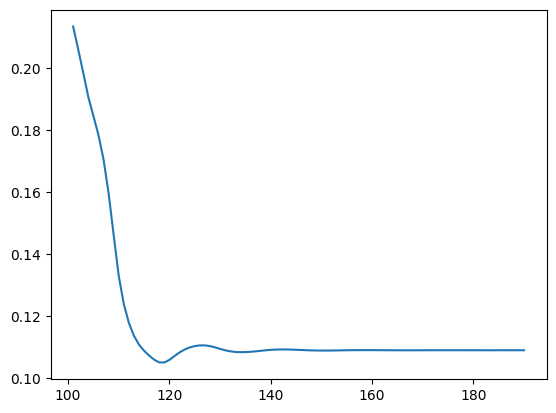

In [53]:
plt.plot(day_pred,scaler.inverse_transform(np.array(lst_output).reshape(-1,1)))